In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [2]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data = pd.read_csv('WEEK4.csv')

In [3]:
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,...,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,silver,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,silver,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,blue,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,red,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,white,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [4]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [5]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
data.dtypes

price                  int64
year                   int64
mileage              float64
AGE_IN_YEARS           int64
chevrolet              int64
dodge                  int64
gmc                    int64
jeep                   int64
nissan                 int64
salvage insurance      int64
black                  int64
blue                   int64
gray                   int64
no_color               int64
silver                 int64
white                  int64
Goa                    int64
MP                     int64
Maharashtra            int64
UP                     int64
black                  uint8
blue                   uint8
gray                   uint8
no_color               uint8
red                    uint8
silver                 uint8
dtype: object

WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [7]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

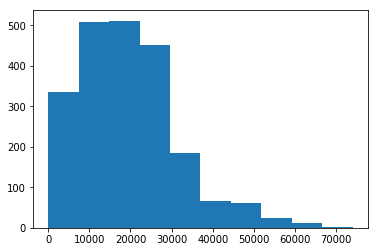

In [8]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

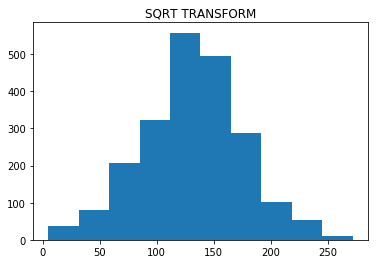

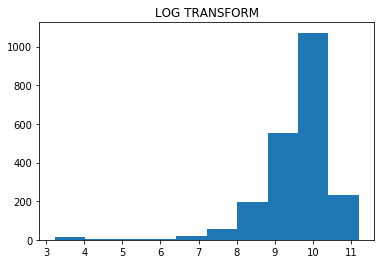

In [9]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [10]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = data['price'].astype(float)
data['price'] = np.sqrt(data['price'])
data['price'].head()

0     53.842363
1     73.143694
2    158.113883
3    166.433170
4     75.498344
Name: price, dtype: float64

In [11]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [12]:
#LET US PRINT THE SHAPES
print('Xtrain Shape: ',X_train.shape)
print('Xtest Shape: ',X_test.shape)
print('Ytrain Shape: ',y_train.shape)
print('Ytest Shape: ',y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

('Xtrain Shape: ', (1722, 25))
('Xtest Shape: ', (431, 25))
('Ytrain Shape: ', (1722,))
('Ytest Shape: ', (431,))

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print('Linear Regression Training mean_square_error is '+str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print('Linear Regression Testing mean_square_error is '+str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
print('Linear Regression Training mean_absolute_error is '+str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print('Linear Regression Testing mean_absolute_error is '+str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577952972215659
Linear Regression Testing R2 score is 0.33405686534152723
Linear Regression Training mean_square_error is 90996194.1332744
Linear Regression Testing mean_square_error is 93999221.85380259
Linear Regression Training mean_absolute_error is 6864.96803052379
Linear Regression Testing mean_absolute_error is 6926.997045722061


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [18]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data

DecTree = DecisionTreeRegressor(max_depth=7,criterion='mse',random_state=1)
DecTree.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Decision Tree Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(DecTree.predict(X_train)))))
print("Decision Tree Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(DecTree.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print('Decision Tree Regression Training mean_square_error is '+str(mean_squared_error(np.square(y_train),np.square(DecTree.predict(X_train)))))
print('Decision Tree Regression Testing mean_square_error is '+str(mean_squared_error(np.square(y_test),np.square(DecTree.predict(X_test)))))
print('Decision Tree Regression Training mean_absolute_error is '+str(mean_absolute_error(np.square(y_train),np.square(DecTree.predict(X_train)))))
print('Decision Tree Regression Testing mean_absolute_error is '+str(mean_absolute_error(np.square(y_test),np.square(DecTree.predict(X_test)))))
# END CODE

Decision Tree Regression Training R2 score is 0.42286965235055507
Decision Tree Regression Testing R2 score is 0.35826324204323845
Decision Tree Regression Training mean_square_error is 81775584.83720995
Decision Tree Regression Testing mean_square_error is 90582442.7694626
Decision Tree Regression Training mean_absolute_error is 6266.210390923734
Decision Tree Regression Testing mean_absolute_error is 6886.9938731253815


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [22]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

SReg = SVR(kernel='poly',max_iter=3000,degree=2,C=0.1)
SReg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Decision Tree Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(SReg.predict(X_train)))))
print("Decision Tree Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(SReg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print('Decision Tree Regression Training mean_square_error is '+str(mean_squared_error(np.square(y_train),np.square(SReg.predict(X_train)))))
print('Decision Tree Regression Testing mean_square_error is '+str(mean_squared_error(np.square(y_test),np.square(SReg.predict(X_test)))))
print('Decision Tree Regression Training mean_absolute_error is '+str(mean_absolute_error(np.square(y_train),np.square(SReg.predict(X_train)))))
print('Decision Tree Regression Testing mean_absolute_error is '+str(mean_absolute_error(np.square(y_test),np.square(SReg.predict(X_test)))))
# END CODE

Decision Tree Regression Training R2 score is -1.2668363605421358e+30
Decision Tree Regression Testing R2 score is -1.279202273087897e+27
Decision Tree Regression Training mean_square_error is 1.7950240305037848e+38
Decision Tree Regression Testing mean_square_error is 1.8056199096570704e+35
Decision Tree Regression Training mean_absolute_error is 7.116532250083465e+17
Decision Tree Regression Testing mean_absolute_error is 3.5132670411083725e+17


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [23]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

RFReg = RandomForestRegressor(n_estimators=200,max_depth=9,n_jobs=-1)
RFReg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Decision Tree Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(RFReg.predict(X_train)))))
print("Decision Tree Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(RFReg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print('Decision Tree Regression Training mean_square_error is '+str(mean_squared_error(np.square(y_train),np.square(RFReg.predict(X_train)))))
print('Decision Tree Regression Testing mean_square_error is '+str(mean_squared_error(np.square(y_test),np.square(RFReg.predict(X_test)))))
print('Decision Tree Regression Training mean_absolute_error is '+str(mean_absolute_error(np.square(y_train),np.square(RFReg.predict(X_train)))))
print('Decision Tree Regression Testing mean_absolute_error is '+str(mean_absolute_error(np.square(y_test),np.square(RFReg.predict(X_test)))))
# END CODE

Decision Tree Regression Training R2 score is 0.5565686881920804
Decision Tree Regression Testing R2 score is 0.39917598987034764
Decision Tree Regression Training mean_square_error is 62831308.396642596
Decision Tree Regression Testing mean_square_error is 84807525.57383537
Decision Tree Regression Training mean_absolute_error is 5489.536760044821
Decision Tree Regression Testing mean_absolute_error is 6697.457554941907


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [24]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.254529
std      11904.200099
min         25.000000
25%      10800.000000
50%      17300.000000
75%      26000.000000
max      74000.000000
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [25]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [26]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [71]:
# INITIALIZE Logistic Regression BY TAKING 
# solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
LogReg = LogisticRegression(solver='lbfgs',max_iter=2000,C=0.5,penalty='l2',random_state=1)
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred).astype(float)
tpr1 = cm1[0][0]/(cm1[0][0]+cm1[1][1])
fpr1 = cm1[0][1]/(cm1[0][1]+cm1[1][1])
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[1][0])
specificity1 = cm1[1][1]/(cm1[1][0]+cm1[1][1])
accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[1][0]+cm1[1][1]+cm1[0][1])
print('TPR LogReg: ',(tpr1))
print('FPR LogReg: ',(fpr1))
print('Sensitivity LogReg: ',(sensitivity1))
print('Specificity LogReg: ',(specificity1))
print('Accuracy LogReg: ',(accuracy1))
# END CODE

('TPR LogReg: ', 0.6050955414012739)
('FPR LogReg: ', 0.2914285714285714)
('Sensitivity LogReg: ', 0.7421875)
('Specificity LogReg: ', 0.6526315789473685)
('Accuracy LogReg: ', 0.728538283062645)


In [72]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
SVMReg = SVC(kernel='rbf',max_iter=1000,gamma='scale',random_state=1)
SVMReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred).astype(float)
tpr1 = cm1[0][0]/(cm1[0][0]+cm1[1][1])
fpr1 = cm1[0][1]/(cm1[0][1]+cm1[1][1])
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[1][0])
specificity1 = cm1[1][1]/(cm1[1][0]+cm1[1][1])
accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[1][0]+cm1[1][1]+cm1[0][1])
print('TPR LogReg: ',(tpr1))
print('FPR LogReg: ',(fpr1))
print('Sensitivity LogReg: ',(sensitivity1))
print('Specificity LogReg: ',(specificity1))
print('Accuracy LogReg: ',(accuracy1))
# END CODE

('TPR LogReg: ', 0.6050955414012739)
('FPR LogReg: ', 0.2914285714285714)
('Sensitivity LogReg: ', 0.7421875)
('Specificity LogReg: ', 0.6526315789473685)
('Accuracy LogReg: ', 0.728538283062645)


In [73]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
SVMReg = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
SVMReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred).astype(float)
tpr1 = cm1[0][0]/(cm1[0][0]+cm1[1][1])
fpr1 = cm1[0][1]/(cm1[0][1]+cm1[1][1])
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[1][0])
specificity1 = cm1[1][1]/(cm1[1][0]+cm1[1][1])
accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[1][0]+cm1[1][1]+cm1[0][1])
print('TPR LogReg: ',(tpr1))
print('FPR LogReg: ',(fpr1))
print('Sensitivity LogReg: ',(sensitivity1))
print('Specificity LogReg: ',(specificity1))
print('Accuracy LogReg: ',(accuracy1))
# END CODE

('TPR LogReg: ', 0.6050955414012739)
('FPR LogReg: ', 0.2914285714285714)
('Sensitivity LogReg: ', 0.7421875)
('Specificity LogReg: ', 0.6526315789473685)
('Accuracy LogReg: ', 0.728538283062645)


In [74]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
SVMReg = RandomForestClassifier(n_estimators=100, max_depth=3,criterion='gini',random_state=1)
SVMReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_train)
cm1 = confusion_matrix(y_train,y_pred).astype(float)
tpr1 = cm1[0][0]/(cm1[0][0]+cm1[1][1])
fpr1 = cm1[0][1]/(cm1[0][1]+cm1[1][1])
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[1][0])
specificity1 = cm1[1][1]/(cm1[1][0]+cm1[1][1])
accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[1][0]+cm1[1][1]+cm1[0][1])
print('TPR LogReg: ',(tpr1))
print('FPR LogReg: ',(fpr1))
print('Sensitivity LogReg: ',(sensitivity1))
print('Specificity LogReg: ',(specificity1))
print('Accuracy LogReg: ',(accuracy1))
# END CODE

('TPR LogReg: ', 0.6389802631578947)
('FPR LogReg: ', 0.34379671150971597)
('Sensitivity LogReg: ', 0.7378917378917379)
('Specificity LogReg: ', 0.6139860139860139)
('Accuracy LogReg: ', 0.7061556329849012)
